## 新能源电动汽车动力电池充电能量预测（五）——数据拆分，前75%为训练集，后25%为测试集

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from datetime import date, datetime
from package import utils
import time
from scipy import stats

### 定义数据处理的类型：1.with_fill（使用填充数据）；2.without_fill（不使用填充数据）

In [2]:
type = 2

### 导入数据

In [3]:
# 导入经过填充之后的数据集合
path = 'whole/filled_by_kmeans'
if type == 2:
    path = 'perfect'
dataset = pd.read_csv('./energy_predict_data/data_prehandle/4_fill_null/%s/predict_data_e_train.csv' % path)
# 数据字段
header = dataset.columns.values.tolist()
# 数据集大小
count = (int)(np.max(dataset['vehicle_id']))
# 数据描述
pd.set_option('precision', 2)
dataset.describe()

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_delta_temp,charge_energy
count,5758.00,5.76e+03,5.76e+03,5758.00,5758.00,5758.00,5758.00,5758.00,5758.00,5758.00,5758.00,5758.00,5758.00,5758.00,5758.00,5758.00,5758.00
mean,11.58,2.02e+13,2.02e+13,6983.27,104002.47,102.40,35.63,76.33,40.69,407.62,437.96,-44.54,-22.38,27.59,15.47,12.12,26.24
std,6.45,4.05e+09,4.05e+09,8206.49,31230.69,65.39,19.65,27.21,22.57,92.81,88.60,48.90,35.36,10.56,11.61,10.11,21.54
min,1.00,2.02e+13,2.02e+13,600.00,45846.60,0.00,0.00,4.80,0.00,252.30,320.70,-202.00,-199.00,-2.00,-7.00,0.00,0.22
25%,5.00,2.02e+13,2.02e+13,2130.25,78262.90,62.90,20.00,50.00,22.00,339.90,374.50,-60.90,-19.60,18.00,5.00,6.00,12.58
50%,12.00,2.02e+13,2.02e+13,3790.00,97343.60,93.60,34.00,88.00,38.00,361.30,392.00,-24.00,-9.30,30.00,15.00,9.00,19.61
75%,17.00,2.02e+13,2.02e+13,6091.50,124132.75,134.00,48.00,100.00,61.00,534.30,553.30,-9.10,-5.00,35.00,25.00,12.00,30.34
max,21.00,2.02e+13,2.02e+13,59960.00,182536.00,490.00,96.00,100.00,99.00,574.60,604.70,-0.10,8.00,52.00,46.00,51.00,103.72


### 数据拆分

In [4]:
dataset_train = pd.DataFrame(columns=header)
dataset_test = pd.DataFrame(columns=header)
for i in range(1, count+1):
    data_vehicle = dataset[dataset['vehicle_id'] == i]
    index_list = data_vehicle.index.tolist()
    data_train = data_vehicle.loc[index_list[0:int(0.75*len(data_vehicle))]].copy()
    data_test = data_vehicle.loc[index_list[int(0.75*len(data_vehicle)):len(data_vehicle)]].copy()
    dataset_train = dataset_train.append(data_train)
    dataset_test = dataset_test.append(data_test)

#### 训练集数据

In [5]:
dataset_train.describe()

,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_delta_temp,charge_energy
count,4313.00,4313.00,4313.00,4313.00,4313.00,4313.00,4313.00,4313.00,4313.00,4313.00,4313.00,4313.00,4313.00
mean,98767.18,103.29,34.41,74.86,40.45,407.46,438.63,-44.72,-22.91,25.29,13.01,12.28,26.45
std,30063.91,66.28,19.59,28.84,22.86,93.46,89.08,48.91,35.96,10.00,10.44,9.40,21.30
min,45846.60,0.00,0.00,4.80,0.40,252.30,320.70,-202.00,-199.00,-2.00,-7.00,0.00,0.22
25%,74482.80,62.50,19.00,38.80,21.20,338.70,374.50,-63.60,-21.70,17.00,4.00,7.00,12.81
50%,90894.00,94.00,33.00,88.00,38.00,361.00,392.80,-24.10,-11.60,28.00,10.00,10.00,19.83
75%,118633.00,135.90,46.00,100.00,62.00,534.70,555.80,-9.20,-5.00,34.00,24.00,13.00,31.01
max,170134.00,490.00,96.00,100.00,99.00,574.60,604.70,-0.10,8.00,49.00,41.00,48.00,103.72


#### 测试集数据

In [6]:
dataset_test.describe()

,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_delta_temp,charge_energy
count,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00
mean,119628.61,99.74,39.28,80.71,41.43,408.08,435.98,-44.01,-20.78,34.44,22.80,11.64,25.62
std,29383.38,62.61,19.36,21.06,21.69,90.88,87.14,48.88,33.48,9.14,11.85,11.95,22.22
min,75285.20,0.00,2.00,11.00,0.00,277.80,322.30,-202.00,-198.00,7.00,-2.00,0.00,0.42
25%,93605.00,63.20,23.00,72.00,24.00,341.90,374.60,-57.30,-16.90,30.00,18.00,6.00,11.73
50%,114990.20,92.70,37.00,87.00,40.00,361.70,389.10,-24.00,-8.50,36.00,26.00,8.00,18.85
75%,137625.00,130.30,54.00,99.00,60.00,533.80,548.90,-9.00,-4.90,40.00,31.00,10.00,28.68
max,182536.00,441.40,93.00,100.00,95.00,571.00,601.40,-0.10,3.90,52.00,46.00,51.00,101.30


### 数据分布

#### 训练集数据分布

/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


((array([-3.5974142 , -3.35974892, -3.22863888, ...,  3.22863888,
          3.35974892,  3.5974142 ]),
  array([   0.217,    0.413,    0.413, ...,  102.7  ,  103.674,  103.722])),
 (19.445324873936535, 26.451271041038719, 0.91220281535910053))

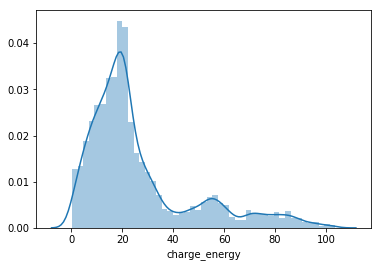

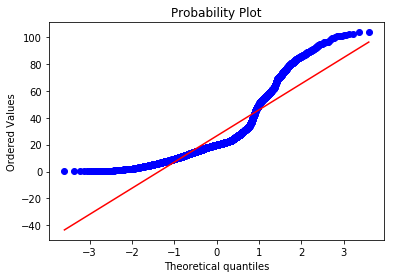

In [7]:
fig = plt.figure()
sns.distplot(dataset_train[dataset_train['charge_energy'].notnull()]['charge_energy']);
fig = plt.figure()
stats.probplot(dataset_train[dataset_train['charge_energy'].notnull()]['charge_energy'], plot=plt)

####  测试集数据分布

/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


((array([-3.30224481, -3.04482832, -2.90166393, ...,  2.90166393,
          3.04482832,  3.30224481]),
  array([   0.424,    0.424,    0.482, ...,   98.98 ,   99.641,  101.301])),
 (19.929677500930929, 25.618816608996546, 0.89553679907043326))

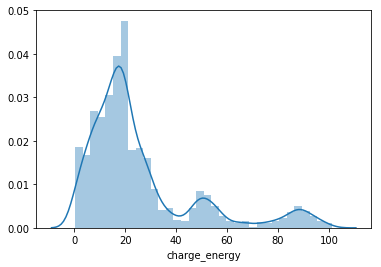

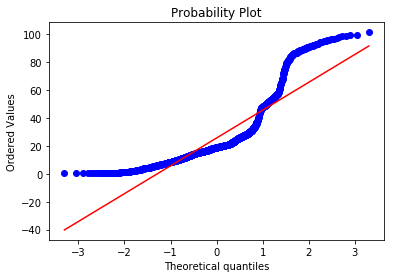

In [8]:
fig = plt.figure()
sns.distplot(dataset_test[dataset_test['charge_energy'].notnull()]['charge_energy']);
fig = plt.figure()
stats.probplot(dataset_test[dataset_test['charge_energy'].notnull()]['charge_energy'], plot=plt)

>观察：训练、测试集合都近似正态分布

### 保存训练集和测试集

In [9]:

dataset_train.to_csv('./energy_predict_data/data_prehandle/5_data_split/train/train_%s.csv' % utils.getType(type), index = False)
dataset_test.to_csv('./energy_predict_data/data_prehandle/5_data_split/test/test_%s.csv' % utils.getType(type), index = False)